Infections:
September: 2134.0
October: 2308.0
November: 1093.0

Recovered
September: 1897.0
October: 2888.0
November: 1114.0

Deceased
September: 39.0
October: 34.0
November: 13.0


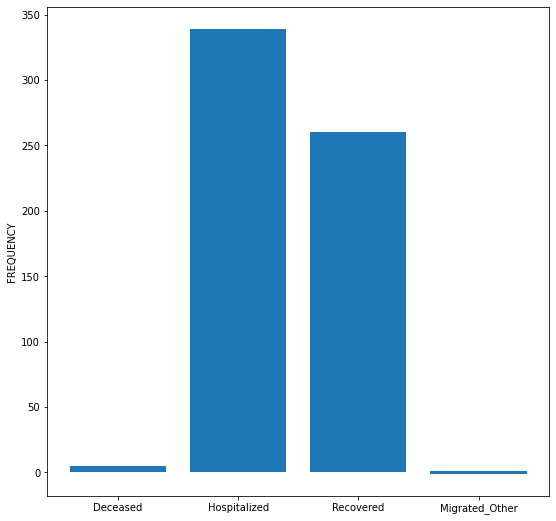

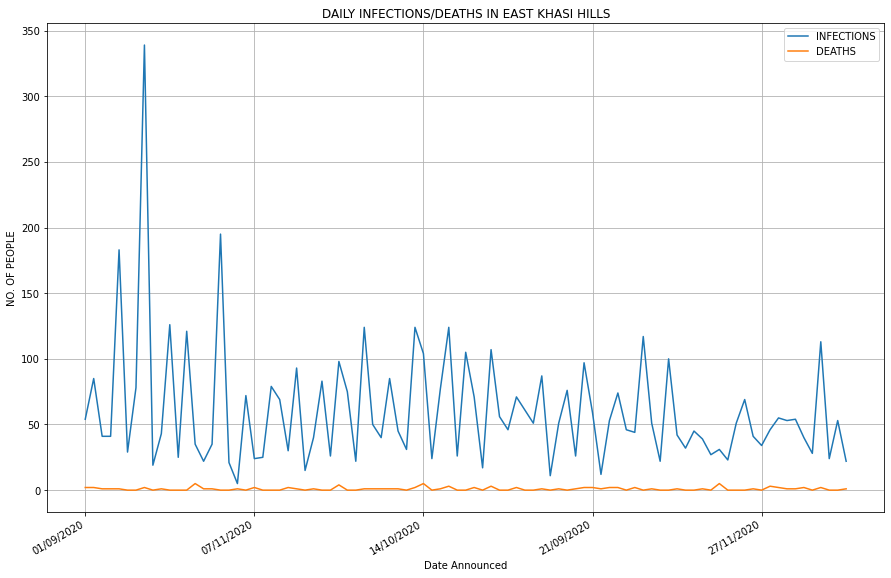

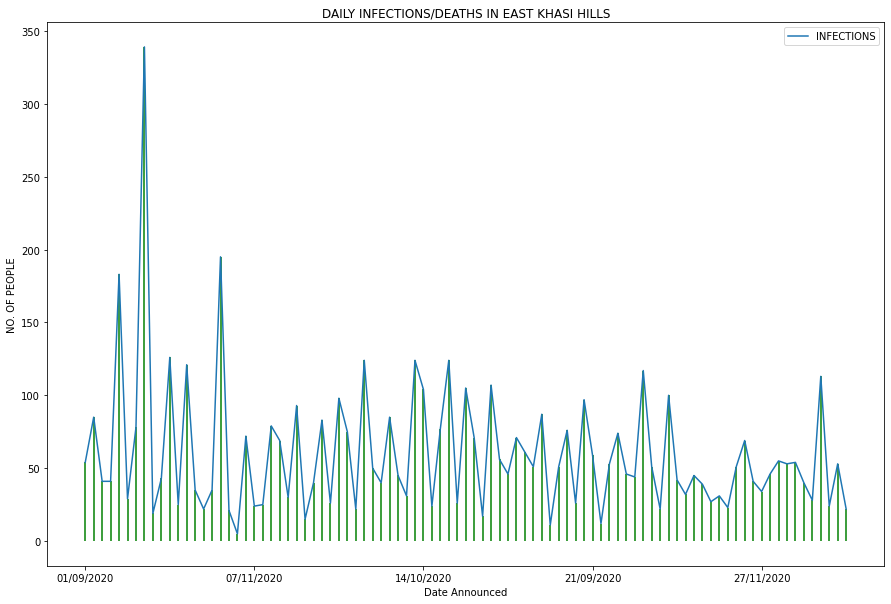

Mean of Infections(daily): 60.824175824175825
Mean of Deaths(daily): 0.945054945054945
Median of Infections(daily): 50.0
Median of Deaths(daily): 1.0

Quartile of Infections:
29.0	50.0	77.0	

Quartile of Deaths:
0.0	1.0	2.0	

In [5]:
#collecting and compiling data for East Khasi Hills alone
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

#importing raw data for all infections from september to november
df=pd.read_csv("/home/garry/Desktop/DATA SCIENCE PRACTICE/EKH COVID DATA/DATASET/raw_data14.csv")
df1=pd.read_csv("/home/garry/Desktop/DATA SCIENCE PRACTICE/EKH COVID DATA/DATASET/raw_data15.csv")
df2=pd.read_csv("/home/garry/Desktop/DATA SCIENCE PRACTICE/EKH COVID DATA/DATASET/raw_data16.csv")
df3=pd.read_csv("/home/garry/Desktop/DATA SCIENCE PRACTICE/EKH COVID DATA/DATASET/raw_data17.csv")
df4=pd.read_csv("/home/garry/Desktop/DATA SCIENCE PRACTICE/EKH COVID DATA/DATASET/raw_data18.csv")
df5=pd.read_csv("/home/garry/Desktop/DATA SCIENCE PRACTICE/EKH COVID DATA/DATASET/raw_data19.csv")

#Compiling data from separate months into one
ekh=df.loc[(df['Detected District']=='East Khasi Hills') & (df['Entry_ID']>261236)]
ekh=ekh.append(df1.loc[(df1['Detected District']=='East Khasi Hills')])
ekh=ekh.append(df2.loc[(df2['Detected District']=='East Khasi Hills')])
ekh=ekh.append(df3.loc[(df3['Detected District']=='East Khasi Hills')])
ekh=ekh.append(df4.loc[(df4['Detected District']=='East Khasi Hills')])
ekh=ekh.append(df5.loc[(df5['Detected District']=='East Khasi Hills')])

#dropping unnecessary columns
ekh_cases=ekh[['Entry_ID','Date Announced','Num Cases','Current Status']]

#display(ekh_cases)
print("Infections:")
print("September:",ekh['Num Cases'].loc[(ekh['Current Status']=='Hospitalized') & (ekh['Entry_ID']<=311620)].sum())
print("October:",ekh['Num Cases'].loc[(ekh['Current Status']=='Hospitalized') & (ekh['Entry_ID']>311620) & (ekh['Entry_ID']<=358758)].sum())
print("November:",ekh['Num Cases'].loc[(ekh['Current Status']=='Hospitalized') & (ekh['Entry_ID']>358758)].sum())
print("\nRecovered")
print("September:",ekh['Num Cases'].loc[(ekh['Current Status']=='Recovered') & (ekh['Entry_ID']<=311620)].sum())
print("October:",ekh['Num Cases'].loc[(ekh['Current Status']=='Recovered') & (ekh['Entry_ID']>311620) & (ekh['Entry_ID']<=358758)].sum())
print("November:",ekh['Num Cases'].loc[(ekh['Current Status']=='Recovered') & (ekh['Entry_ID']>358758)].sum())
print("\nDeceased")
print("September:",ekh['Num Cases'].loc[(ekh['Current Status']=='Deceased') & (ekh['Entry_ID']<=311620)].sum())
print("October:",ekh['Num Cases'].loc[(ekh['Current Status']=='Deceased') & (ekh['Entry_ID']>311620) & (ekh['Entry_ID']<=358758)].sum())
print("November:",ekh['Num Cases'].loc[(ekh['Current Status']=='Deceased') & (ekh['Entry_ID']>358758)].sum())


#Saving the final dataset
#ekh_cases.to_excel('/home/garry/Desktop/DATA SCIENCE PRACTICE/EKH COVID DATA/DATASET/Covid_Data_EastKhasiHills.xlsx',index=False)

#Grouping the individual entry into a single categorical entry
ekh_cases=ekh_cases.groupby(['Date Announced','Current Status'],as_index=False).sum()
#ekh_cases.to_excel('/home/garry/Desktop/DATA SCIENCE PRACTICE/EKH COVID DATA/DATASET/Covid_Data_EastKhasiHills_final.xlsx',index=False)

#entering data for days that had zero deaths
check=ekh_cases[['Date Announced','Current Status']].values.tolist()
dates=set(ekh_cases['Date Announced'])
for i in dates:
    if [i,'Deceased'] not in check:
        xxx={'Date Announced':i,'Current Status':'Deceased','Entry_ID':0,'Num Cases':0}
        ekh_cases=ekh_cases.append(xxx,ignore_index=True)






#Plotting
plt.figure(figsize=(9,9))
plt.ylabel('FREQUENCY')
plt.bar(ekh_cases['Current Status'],ekh_cases['Num Cases'])
plt.show()


ekh_plot=ekh_cases.loc[ekh_cases['Current Status']=='Hospitalized']
ekh_plot1=ekh_cases.loc[ekh_cases['Current Status']=='Deceased']
ekh=pd.merge(ekh_plot,ekh_plot1,on='Date Announced')
ekh = ekh.rename(columns = {"Num Cases_x":"INFECTIONS"}) 
ekh = ekh.rename(columns = {"Num Cases_y":"DEATHS"}) 
ekh.plot(x ='Date Announced', y=['INFECTIONS','DEATHS'], kind = 'line',figsize=(15,10),title='DAILY INFECTIONS/DEATHS IN EAST KHASI HILLS',ylabel='NO. OF PEOPLE')
plt.gcf().autofmt_xdate()
plt.grid()
plt.show()


ekh.plot(x ='Date Announced', y='INFECTIONS', kind = 'line',figsize=(15,10),title='DAILY INFECTIONS/DEATHS IN EAST KHASI HILLS',ylabel='NO. OF PEOPLE')
plt.vlines(list(ekh_cases['Date Announced'].loc[ekh_cases['Current Status']=='Hospitalized']),0,list(ekh_cases['Num Cases'].loc[ekh_cases['Current Status']=='Hospitalized']),color='g')
plt.show()



#calculating mean,median
print("Mean of Infections(daily):",ekh_cases['Num Cases'].loc[ekh_cases['Current Status']=='Hospitalized'].mean())
print("Mean of Deaths(daily):",ekh_cases['Num Cases'].loc[ekh_cases['Current Status']=='Deceased'].mean())
print("Median of Infections(daily):",ekh_cases['Num Cases'].loc[ekh_cases['Current Status']=='Hospitalized'].median())
print("Median of Deaths(daily):",ekh_cases['Num Cases'].loc[ekh_cases['Current Status']=='Deceased'].median())


#calculating quartile infections
hos=list(ekh_cases['Num Cases'].loc[ekh_cases['Current Status']=='Hospitalized'])
quartile=pd.qcut(hos,4,labels=False)
decile=pd.qcut(hos,10,labels=False)
part1=pd.DataFrame(list(zip(hos,quartile,decile)),columns=['Case','Quartile','Decile'])
print("\nQuartile of Infections:")
for i in range(3):
    print(max(part1['Case'].loc[part1['Quartile']==i]),end='\t')
print()



#calculating quartile of Deaths
ded=list(ekh_cases['Num Cases'].loc[ekh_cases['Current Status']=='Deceased'])
ded.sort()
quart_index=[]
dec_index=[]

if len(ded)%4==0:
    quart_index.append(len(ded)/4)
else:
    quart_index.append((len(ded)//4)+1)

for i in range(2,4):
    quart_index.append(quart_index[0]*i)
  
print("\nQuartile of Deaths:")
for i in quart_index:
    print(ded[int(i-1)],end='\t')

    
    
    
    

